In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          mic.xlsx


In [5]:
df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [6]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

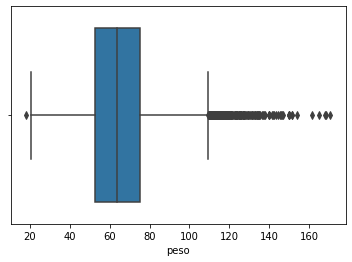

In [59]:
sns.boxplot(x = df['peso'],
           )

In [43]:
my_pivot = pd.pivot_table(df,
                          index = 'desc_ent',
                          values = ['peso', 'cadera'],
                          aggfunc = 'median',
                          columns = 'sexo'
                         )
my_pivot

cadera              peso         
sexo                                   1        2        1        2
desc_ent                                                           
AGUASCALIENTES                    95.650  100.000  69.9500  63.7000
BAJA CALIFORNIA                   97.600  100.500  70.6500  64.2000
BAJA CALIFORNIA SUR              100.300  101.800  76.6500  68.5500
CAMPECHE                          96.900   99.975  67.3500  62.3750
CHIAPAS                           91.000   94.550  59.2000  56.0250
CHIHUAHUA                         97.400  100.600  69.3000  64.6250
COAHUILA DE ZARAGOZA              96.400  102.400  68.3000  67.3000
COLIMA                            98.050  102.600  71.7000  66.0000
DISTRITO FEDERAL                  96.525   99.900  69.0000  61.4500
DURANGO                           96.700   98.500  70.3500  62.5000
GUANAJUATO                        93.875   98.000  65.0625  60.3250
GUERRERO                          91.425   96.550  60.5000  57.2000
HIDALGO                           93.000   96.100  63.3000  57.9000
JALISCO                           94.575  101.050  65.5875  63.3500
MEXICO                            93.500   96.475  62.4500  56.9500
MICHOACAN DE OCAMPO               94.450   99.150  67.6250  63.4000
MORELOS                           93.750   98.800  65.2000  61.4500
NAYARIT                           96.700   99.200  69.0500  63.7000
NUEVO LEON                        97.000  100.700  69.4000  65.1000
OAXACA                            91.750   95.150  59.5500  56.8000
PUEBLA                            93.100   97.000  61.8750  59.5500
QUERETARO                         95.500   97.600  65.2750  59.4500
QUINTANA ROO                      95.625   99.950  65.9250  60.8500
SAN LUIS POTOSI                   93.050   96.575  62.2000  57.4500
SINALOA                           97.000  100.900  71.1000  64.3000
SONORA                            97.600  101.200  72.3000  66.6500
TABASCO                           96.400  100.000  69.7500  62.6000
TAMAULIPAS                        98.000  101.000  72.7500  63.3500
TLAXCALA                          94.575   96.500  64.2750  59.8750
VERACRUZ DE IGNACIO DE LA LLAVE   93.775   98.400  64.3000  59.4725
YUCATAN                           95.250   98.150  66.0000  59.5750
ZACATECAS                         95.300   99.000  65.3000  61.6250

In [32]:
my_pivot.columns

MultiIndex([('cadera', 1),
            ('cadera', 2),
            (  'peso', 1),
            (  'peso', 2)],
           names=[None, 'sexo'])

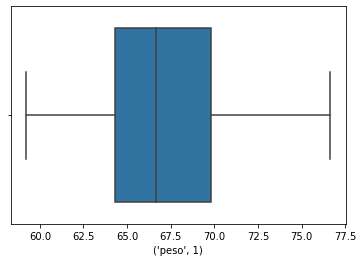

In [33]:
sns.boxplot(x = my_pivot['peso', 1],
            whis = (0,100),
           )

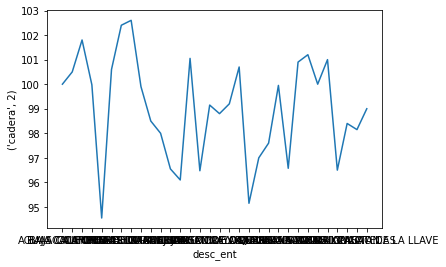

In [38]:
sns.lineplot(data = my_pivot['cadera', 2],
           )

In [51]:
my_pivot = pd.pivot_table(df,
                          index = 'desc_ent',
                          values = ['ropa'],
                          aggfunc = 'sum',
                          columns = 'sexo',
                         )
my_pivot.head(10)

ropa     
sexo                    1    2
desc_ent                      
AGUASCALIENTES        493  579
BAJA CALIFORNIA       402  466
BAJA CALIFORNIA SUR   415  440
CAMPECHE              350  443
CHIAPAS               378  540
CHIHUAHUA             415  526
COAHUILA DE ZARAGOZA  417  439
COLIMA                410  543
DISTRITO FEDERAL      247  298
DURANGO               425  515

In [52]:
pivot3 = my_pivot.sort_values (by =[('ropa', 2)],
                            ascending = False,
                            axis = 0
                           )
pivot3.head(10)



ropa     
sexo                               1    2
desc_ent                                 
SAN LUIS POTOSI                  537  694
VERACRUZ DE IGNACIO DE LA LLAVE  454  667
GUANAJUATO                       467  590
AGUASCALIENTES                   493  579
GUERRERO                         431  570
QUERETARO                        496  566
MORELOS                          361  554
OAXACA                           372  551
MICHOACAN DE OCAMPO              408  543
COLIMA                           410  543

In [54]:
pivot3 = pivot3.head(10)

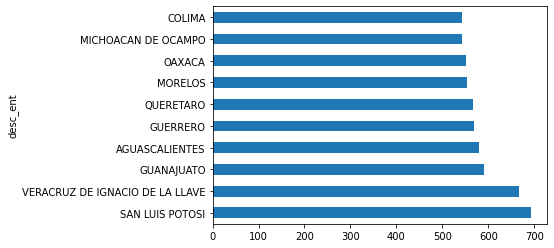

In [55]:
pivot3['ropa', 2].plot(kind = 'barh')

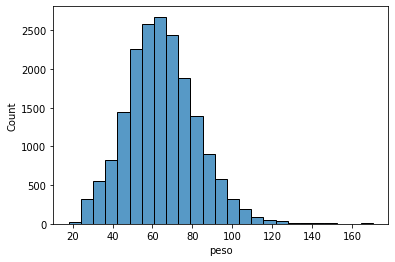

In [58]:
sns.histplot(df['peso'],
             kde = False,
             bins = 25)